# Make Me Data Science VII

# Part 1 - Create Data

## Prepare PrepPy

In [ ]:
! git clone https://github.com/gitmystuff/preppy.git

In [ ]:
# import shutil

# # Source file path (within your Drive)
# source_file = '/content/drive/MyDrive/Colab Notebooks/preppy report.py'

# # Destination path (root of your Drive)
# destination_path = '/content/preppy/utils/report.py'

# # Copy the file
# shutil.copy(source_file, destination_path)

## Create the Data

### Seed the Project

In [3]:
# seed
import random

seed_id = 11797610
random_state = random.seed(seed_id)
random_state

### Faker

In [4]:
# pip install Faker

In [5]:
state_names=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [6]:
# create demographic data
import numpy as np
import pandas as pd
from faker import Faker
fake = Faker()

output = []
for x in range(1000):
  binary = np.random.choice(['binary_1', 'binary_2'], p=[0.5, 0.5])
  output.append({
        'binary': binary, # sex assigned at birth
        'given_name': fake.first_name_female() if binary=='binary_1' else fake.first_name_male(),
        'surname': fake.last_name(),
        'date_of_birth': fake.date_of_birth(),
        'phone_number': fake.phone_number(),
        'email': fake.email(),
        'address': fake.address(),
        'city': fake.city(),
        'state': np.random.choice(state_names),
        'zipcode': fake.zipcode(),
        })

demographics = pd.DataFrame(output)
demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode
0,binary_1,Joann,Brown,1914-01-13,2486144013,yburke@example.org,"46583 Julie Rue Suite 948\nJonesfurt, MN 27847",Port David,Tennessee,46750
1,binary_1,Michelle,Burnett,1951-02-13,622-397-0672x17104,ericadavis@example.com,90736 Richardson Neck Apt. 059\nNew Jordanside...,East Veronicaville,North Dakota,47799
2,binary_1,Heidi,Cohen,1967-01-24,001-784-689-7718x885,gilmorekristine@example.net,"4929 Jennifer Radial\nJessefort, NC 56017",West Jamesport,Missouri,47923
3,binary_1,Kimberly,Brown,1987-02-17,001-862-374-5496x67084,justinhernandez@example.org,"367 Figueroa Orchard Suite 428\nWest Randy, ME...",North Mark,Arizona,71276
4,binary_1,Michelle,Clark,1968-09-20,973-962-4494x3015,kherring@example.org,"8977 Jonathan Mountains\nJimhaven, OH 68140",North Bethmouth,Pennsylvania,45169


In [7]:
def parse_address_v2(text):
  """
  Parses an address string into street address, city, state, and zipcode.
  This version handles potential variations in the input format.

  Args:
    text: The address string to parse.

  Returns:
    A dictionary containing the parsed address components.
  """

  try:
    # Split the input into lines
    lines = text.strip().split('\n')

    # Extract the street address from the first line
    street_address = lines[0].strip()

    # Extract the city, state, and zipcode from the second line
    city_state_zip = lines[1].strip().split(',')
    city = city_state_zip[0].strip()
    state_zip = city_state_zip[1].strip().split()
    state = state_zip[0].strip()
    zipcode = state_zip[1].strip()

    return {
        'street_address': street_address,
        'city': city,
        'state': state,
        'zipcode': zipcode
    }

  except (IndexError, ValueError):
    return None

# Example usage
text = "80974 Jeffrey Mountains\nWest Benjamin, IL 82801"
address = parse_address_v2(text)

if address:
  print(address)
else:
  print("Could not parse the address.")

{'street_address': '80974 Jeffrey Mountains', 'city': 'West Benjamin', 'state': 'IL', 'zipcode': '82801'}


In [8]:
# Apply the parse_address function to each row of the 'address' column
demographics[['nu_address', 'nu_city', 'nu_state', 'nu_zipcode']] = demographics['address'].apply(lambda x: pd.Series(parse_address_v2(x)))

demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,nu_address,nu_city,nu_state,nu_zipcode
0,binary_1,Joann,Brown,1914-01-13,2486144013,yburke@example.org,"46583 Julie Rue Suite 948\nJonesfurt, MN 27847",Port David,Tennessee,46750,46583 Julie Rue Suite 948,Jonesfurt,MN,27847
1,binary_1,Michelle,Burnett,1951-02-13,622-397-0672x17104,ericadavis@example.com,90736 Richardson Neck Apt. 059\nNew Jordanside...,East Veronicaville,North Dakota,47799,90736 Richardson Neck Apt. 059,New Jordanside,GA,29951
2,binary_1,Heidi,Cohen,1967-01-24,001-784-689-7718x885,gilmorekristine@example.net,"4929 Jennifer Radial\nJessefort, NC 56017",West Jamesport,Missouri,47923,4929 Jennifer Radial,Jessefort,NC,56017
3,binary_1,Kimberly,Brown,1987-02-17,001-862-374-5496x67084,justinhernandez@example.org,"367 Figueroa Orchard Suite 428\nWest Randy, ME...",North Mark,Arizona,71276,367 Figueroa Orchard Suite 428,West Randy,ME,99026
4,binary_1,Michelle,Clark,1968-09-20,973-962-4494x3015,kherring@example.org,"8977 Jonathan Mountains\nJimhaven, OH 68140",North Bethmouth,Pennsylvania,45169,8977 Jonathan Mountains,Jimhaven,OH,68140


In [9]:
# drop address, city, state, zipcode and rename nu_ etc.
demographics.drop(['address', 'city', 'state', 'zipcode'], axis=1, inplace=True)
demographics.rename(columns={'nu_address': 'address', 'nu_city': 'city', 'nu_state': 'state', 'nu_zipcode': 'zipcode'}, inplace=True)
demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode
0,binary_1,Joann,Brown,1914-01-13,2486144013,yburke@example.org,46583 Julie Rue Suite 948,Jonesfurt,MN,27847
1,binary_1,Michelle,Burnett,1951-02-13,622-397-0672x17104,ericadavis@example.com,90736 Richardson Neck Apt. 059,New Jordanside,GA,29951
2,binary_1,Heidi,Cohen,1967-01-24,001-784-689-7718x885,gilmorekristine@example.net,4929 Jennifer Radial,Jessefort,NC,56017
3,binary_1,Kimberly,Brown,1987-02-17,001-862-374-5496x67084,justinhernandez@example.org,367 Figueroa Orchard Suite 428,West Randy,ME,99026
4,binary_1,Michelle,Clark,1968-09-20,973-962-4494x3015,kherring@example.org,8977 Jonathan Mountains,Jimhaven,OH,68140


### Create Independent Variable Correlated with Class

In [10]:
import numpy as np
import pandas as pd

def generate_feature(df, class_col, coeff, intercept):
    """
    Generates normally distributed feature data for a logistic regression model.

    Args:
        df: The pandas DataFrame containing the class column.
        class_col: The name of the class column (containing 0s and 1s).
        coeff: The coefficient for the feature in the logistic regression model.
        intercept: The intercept of the logistic regression model.

    Returns:
        A pandas Series containing the generated feature data.
    """

    # Generate probabilities based on the class
    probs = np.random.rand(len(df))  # Initial random probabilities
    probs = np.where(df[class_col] == 1, probs * 0.8 + 0.2, probs * 0.8)  # Adjust for class

    # Apply the inverse logit (logit) function
    logits = np.log(probs / (1 - probs))

    # Calculate the feature values
    feature_values = (logits - intercept) / coeff

    return pd.Series(feature_values)



### Make Classification

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

def make_linear_y(row):
  model = LogisticRegression()
  model.fit(X, y)
  coefficients = model.coef_
  intercept = model.intercept_
  f_of_x = intercept + coefficients[0][0]*row['informative_1'] + coefficients[0][1]*row['informative_2']
  # print(f_of_x[0])
  return f_of_x[0]

# Adjust the make_classification parameters:
# Set n_informative and n_redundant to values that sum to less than n_features
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)
df = pd.DataFrame(X, columns=['informative_1', 'informative_2'])
df = pd.concat([demographics, df], axis=1).reset_index(drop=True)

df['target'] = df.apply(make_linear_y, axis=1) # an independent variable
df['class'] = y # the dependent variable
df['corr_feature_class'] = generate_feature(df, 'class', 0.5, -1)
df.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,informative_1,informative_2,target,class,corr_feature_class
0,binary_1,Joann,Brown,1914-01-13,2486144013,yburke@example.org,46583 Julie Rue Suite 948,Jonesfurt,MN,27847,-0.999102,-0.663860,-0.904224,1,-0.288387
1,binary_1,Michelle,Burnett,1951-02-13,622-397-0672x17104,ericadavis@example.com,90736 Richardson Neck Apt. 059,New Jordanside,GA,29951,1.246686,1.153597,2.324370,1,1.009529
2,binary_1,Heidi,Cohen,1967-01-24,001-784-689-7718x885,gilmorekristine@example.net,4929 Jennifer Radial,Jessefort,NC,56017,0.962777,0.859397,1.778217,1,2.581847
3,binary_1,Kimberly,Brown,1987-02-17,001-862-374-5496x67084,justinhernandez@example.org,367 Figueroa Orchard Suite 428,West Randy,ME,99026,-2.957441,2.033645,5.451235,1,4.793698
4,binary_1,Michelle,Clark,1968-09-20,973-962-4494x3015,kherring@example.org,8977 Jonathan Mountains,Jimhaven,OH,68140,1.141165,1.059449,2.153926,1,1.557657


### Automation Functions

1. gen_null(series, perc)
2. gen_quasi_constants(primary_label, variation_percentage=.2, replace=False)
3. gen_normal_data(mu=0, std=1, size=len(df))
4. gen_uniform_data(size=len(df))
5. gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
6. gen_correlated_normal_series(original_series, target_correlation, size=len(df))
7. gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
8. gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
9. gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000)
10. gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10)
11. random_choice_data(choices, size)

In [12]:
# functions
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize


def gen_null(series, perc):
  """
  Introduces null values (np.nan) into a list based on a specified percentage.

  Args:
      var: The variable to modify.
      perc: The percentage of values to replace with nulls (0-100).

  Returns:
      The modified variable with null.
  """
  var = series.copy()
  num_nulls = int(len(var) * (perc / 100))
  indices_to_replace = np.random.choice(len(var), num_nulls, replace=False)

  for idx in indices_to_replace:
      var[idx] = np.nan

  return var

def gen_quasi_constants(primary_label, variation_percentage=.2, size=len(df)):
  """
  Generates quasi-constant labels for a Series, with a small percentage of variation.

  Args:
      primary_label: The main label to use for most values.
      variation_percentage: The percentage of labels to vary (0-100).

  Returns:
      A new Series containing the quasi-constant labels.
  """

  series = pd.Series(np.full(size, primary_label))
  num_variations = int(size * (variation_percentage / 100))
  variation_indices = np.random.choice(series.index, num_variations, replace=False)
  primary_label = primary_label + '_0'
  variation1 = primary_label + '_1'
  variation2 = primary_label + '_2'

  labels = pd.Series([primary_label] * len(series), index=series.index)
  labels.loc[variation_indices] = np.random.choice([variation1, variation2], size=num_variations)  # Adjust variations as needed

  return labels

def gen_normal_data(mu=0, std=1, size=len(df)):
  """
  Generates a normal dataset given the mean and standard deviation

  Args:
        mu: The mean of the normal distribution.
        std: The standard deviation of the normal distribution.
        size: The number of data points to generate.

  Returns:
        A normally distributed series.
  """
  return np.random.normal(mu, std, size)

def gen_uniform_data(size=len(df)):
  """
  Generates a uniform dataset

  Args:
        size: The number of data points to generate.

  Returns:
        A uniform distributed series.
  """
  return np.random.uniform(size=size)

def gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df)):
  """
  Generates two datasets with a multivariate normal distribution given the mean and covariance matrix

  Args:
        mean: The mean of each of the datasets.
        cov: The covariance matrix of the datasets.
        size: The number of data points to generate.

  Returns:
        Two correlated series.
  """
  ds1, ds2 = np.random.multivariate_normal(mean, cov, size, tol=1e-6).T # ds = dataset
  return ds1, ds2

def gen_correlated_normal_series(original_series, target_correlation, size=len(df)):
  """
  Generates a correlated series based on a given series.

  This function takes an original series as input and generates a new series
  that is correlated with the original series. The correlation between the
  original and generated series is approximately equal to the specified
  target correlation.

  The generated series is created by linearly transforming the original series
  and adding Gaussian noise with an adjusted standard deviation to achieve the
  desired correlation.

  Args:
      original_series (numpy.ndarray): The original series.
      target_correlation (float): The desired Pearson correlation coefficient
          between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series.
  """
  return np.mean(original_series) + target_correlation * (original_series - np.mean(original_series)) \
  +  np.random.normal(0, np.sqrt(1 - target_correlation**2) * np.std(original_series), len(original_series))
  """
  Explanation

  This one-liner leverages the properties of linear transformations and normal distributions to generate a correlated series.

  It first centers the original_series by subtracting its mean.
  It then scales this centered series by the target_correlation.
  Finally, it adds Gaussian noise with a standard deviation adjusted to ensure the overall correlation matches the target_correlation.
  """

def gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df)):
  """
  Work in progress

  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.
      size: The number of data points to generate.

  Returns:
      The generated correlated series with a uniform distribution.
  """
  z_scores = (original_series - np.mean(original_series)) / np.std(original_series)
  correlation_coefficient=.7
  return norm.cdf(correlation_coefficient * norm.ppf(np.random.uniform(size=size)) + np.sqrt(1 - correlation_coefficient**2) * z_scores)

def pearson_r_func(x, y, y_mean, y_std, desired_r):
    x_mean = np.mean(x)
    x_std = np.std(x)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = x_std * y_std * len(x)
    calculated_r = numerator / denominator
    return (calculated_r - desired_r)**2  # Minimize the squared difference

def minimize_r(original_series, target_correlation, size=len(df)):
    y = original_series
    y_mean = np.mean(y)
    y_std = np.std(y)
    desired_r = target_correlation

    # Initial guess for x values
    x0 = np.random.uniform(size=len(original_series))

    # Solve for x
    result = minimize(pearson_r_func, x0, args=(y, y_mean, y_std, desired_r))

    if result.success:
        x_solution = result.x
        # print("Solution for x:", x_solution)
        return x_solution
    else:
        print("Optimization failed.")

def gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3):
    """
    Generates a normal distribution with outliers.

    Args:
        mean (float): The mean of the normal distribution.
        std_dev (float): The standard deviation of the normal distribution.
        size (int): The number of samples to generate.
        outlier_percentage (float): The percentage of outliers to introduce (between 0 and 1).
        outlier_magnitude (float): The magnitude by which outliers deviate from the mean.

    Returns:
        numpy.ndarray: The generated data with outliers.
    """
    data = np.random.normal(mean, std_dev, size)
    num_outliers = int(size * outlier_percentage)
    outlier_indices = np.random.choice(size, num_outliers, replace=False)
    for index in outlier_indices:
        if np.random.rand() < 0.5:
            data[index] += outlier_magnitude
        else:
            data[index] -= outlier_magnitude

    return data

def gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000):
  """
  Generates data with a specified mean and standard deviation, then scales it by a factor to create a distribution needing scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      scale_factor (float): The factor by which to scale the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """
  original_data = np.random.normal(mean, std_dev, size)
  return original_data * scale_factor

def gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10):
  """
  Generates data with a specified mean and standard deviation, then scales and shifts it to create a distribution needing MinMax scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      range_factor (float): The factor to expand the range of the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """

  # Generate the original data
  original_data = np.random.normal(mean, std_dev, size)

  # Expand the range of the data
  min_val = np.min(original_data)
  max_val = np.max(original_data)
  return (original_data - min_val) * range_factor + min_val

def random_choice_data(choices, size):
  """
  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series with a uniform distribution.
  """
  return np.random.choice(choices, size=size)


In [13]:
# categorical variables with little correlation to sales
df['random choice 2'] = random_choice_data(['Rand Choice 1', 'Rand Choice 2'], size=len(df))
df['random choice 4'] = random_choice_data(['North', 'South', 'East', 'West'], size=len(df))
df['random choice 7'] = random_choice_data(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=len(df))

# categorical random choices with random # of labels
num_labels = np.random.randint(3, 5)
df[f'random label num {num_labels}'] = random_choice_data([f'label num lo {i}' for i in range(1, num_labels + 1)], size=len(df))

num_labels = np.random.randint(10, 15)
df[f'random label num {num_labels}'] = random_choice_data([f'label num hi {i}' for i in range(1, num_labels + 1)], size=len(df))

In [14]:
# categorical variables correlated with target
df['pd qcut1'] = pd.qcut(df['target'], 2, labels=['Low', 'High']) # bi label
df['pd qcut2'] = pd.qcut(df['target'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']) # 4 labels

quantiles = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
df['pd qcut3'] = pd.qcut(df['target'], quantiles, labels=['G1', 'G2', 'G3', 'G4', 'G5', 'G6']) # 6 labels

In [15]:
# generate four numerical normally distributed continuous features that have a correlation greater than absolute value of .5 with each other
# gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
df['multicollinearity 1'], df['multicollinearity 2'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .7], [.7, 1]], size=len(df))
df['multicollinearity 3'], df['multicollinearity 4'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .9], [.9, 1]], size=len(df))

In [16]:
# generate two normally distributed features that are correlated with the target
# gen_correlated_normal_series(original_series, target_correlation, size=len(df))
df['correlated w target 1'] = gen_correlated_normal_series(df['target'], target_correlation=.5)
df['correlated w target 2'] = gen_correlated_normal_series(df['target'], target_correlation=.7)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1000 non-null   object  
 1   given_name             1000 non-null   object  
 2   surname                1000 non-null   object  
 3   date_of_birth          1000 non-null   object  
 4   phone_number           1000 non-null   object  
 5   email                  1000 non-null   object  
 6   address                880 non-null    object  
 7   city                   880 non-null    object  
 8   state                  880 non-null    object  
 9   zipcode                880 non-null    object  
 10  informative_1          1000 non-null   float64 
 11  informative_2          1000 non-null   float64 
 12  target                 1000 non-null   float64 
 13  class                  1000 non-null   int64   
 14  corr_feature_class     1000 non-null   fl

                uniform corr 1  uniform corr 2    target
uniform corr 1        1.000000        0.517198  0.704799
uniform corr 2        0.517198        1.000000  0.719649
target                0.704799        0.719649  1.000000


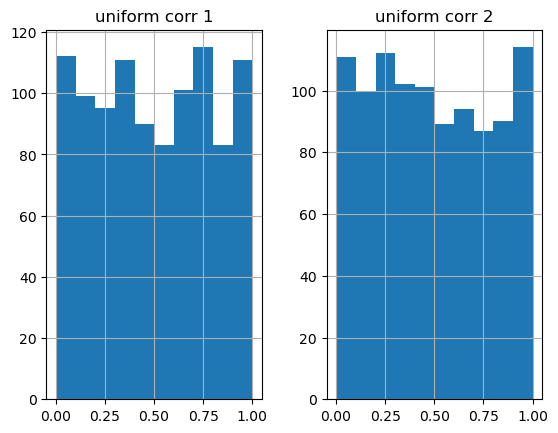

In [17]:
# generate two uniformly distributed features that are correlated with the target
# gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
df['uniform corr 1'] = gen_correlated_uniform_series(df['target'])
df['uniform corr 2'] = gen_correlated_uniform_series(df['target'])

print(df[['uniform corr 1', 'uniform corr 2', 'target']].corr())
df[['uniform corr 1', 'uniform corr 2']].hist();

In [18]:
# create two features that are duplicates of other features
df['duplicate_1'] = df['informative_1']
df['duplicate_2'] = df['informative_2']

In [19]:
# create two numerical features with outliers
df['outliers 1'] = gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
df['outliers 2'] = gen_outliers(mean=3, std_dev=2, size=len(df), outlier_percentage=0.2, outlier_magnitude=2)

In [20]:
# create a numerical feature that needs standard scaling
df['standard scaling'] = gen_standard_scaling()

In [21]:
# create a numerical feature that needs min max scaling
df['min max scaling'] = gen_minmax_scaling()

In [22]:
# generate null values
for col in df.drop(['class', 'informative_1', 'informative_2', 'target', 'duplicate_1', 'duplicate_2'], axis=1).columns:
    df[col] = gen_null(df[col], np.random.choice([0, 5, 10, 20, 30, 50], size=1).item())

In [23]:
# create two features that have constant values
df['constant_1'] = 'constant_value'
df['constant_2'] = 'constant_value'

In [24]:
# create two features with semi constant values
df['semi_constant_1'] = gen_quasi_constants('q_const', variation_percentage = 1)
df['semi_constant_2'] = gen_quasi_constants('q_const', variation_percentage = 1)

In [25]:
print(df.info())  # check your work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 950 non-null    object  
 1   given_name             900 non-null    object  
 2   surname                500 non-null    object  
 3   date_of_birth          500 non-null    object  
 4   phone_number           700 non-null    object  
 5   email                  950 non-null    object  
 6   address                880 non-null    object  
 7   city                   695 non-null    object  
 8   state                  880 non-null    object  
 9   zipcode                445 non-null    object  
 10  informative_1          1000 non-null   float64 
 11  informative_2          1000 non-null   float64 
 12  target                 1000 non-null   float64 
 13  class                  1000 non-null   int64   
 14  corr_feature_class     1000 non-null   fl

In [26]:
# add duplicates
dupes = df.loc[0:9]
df = pd.concat([df, dupes], axis=0)

# shuffle all columns
# df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1, axis=1)

# shuffle selected columns
demographic_columns = demographics.columns
remaining_columns = [col for col in df.columns if col not in demographic_columns]
# print(remaining_columns)
np.random.shuffle(remaining_columns)

# Reassemble the DataFrame with the shuffled columns
df = df[list(demographic_columns) + list(remaining_columns)]

# move target to the end of the list
class_var = 'class'
df = df[df.drop('class', axis=1).columns.tolist() + [class_var]]

print(df.shape)
print(df.info())
df.head()

(1010, 41)
<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 960 non-null    object  
 1   given_name             910 non-null    object  
 2   surname                503 non-null    object  
 3   date_of_birth          504 non-null    object  
 4   phone_number           706 non-null    object  
 5   email                  959 non-null    object  
 6   address                890 non-null    object  
 7   city                   704 non-null    object  
 8   state                  890 non-null    object  
 9   zipcode                452 non-null    object  
 10  random choice 2        503 non-null    object  
 11  constant_1             1010 non-null   object  
 12  random label num 4     505 non-null    object  
 13  semi_constant_1        1010 non-null   object  
 14  semi_constant_2        1010 non-null 

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,outliers 1,multicollinearity 2,uniform corr 1,pd qcut2,informative_1,target,multicollinearity 4,duplicate_1,informative_2,class
0,binary_1,Joann,Brown,1914-01-13,NaN,yburke@example.org,46583 Julie Rue Suite 948,Jonesfurt,MN,27847,...,-4.161744,0.081533,0.101275,Q2,-0.999102,-0.904224,1.463531,-0.999102,-0.663860,1
1,binary_1,Michelle,Burnett,NaN,NaN,ericadavis@example.com,90736 Richardson Neck Apt. 059,New Jordanside,GA,29951,...,-1.555503,-1.845419,0.506709,Q3,1.246686,2.324370,0.416412,1.246686,1.153597,1
2,binary_1,Heidi,Cohen,NaN,001-784-689-7718x885,gilmorekristine@example.net,4929 Jennifer Radial,Jessefort,NC,NaN,...,1.845540,-1.655382,0.368192,NaN,0.962777,1.778217,-0.058432,0.962777,0.859397,1
3,binary_1,Kimberly,NaN,1987-02-17,001-862-374-5496x67084,NaN,367 Figueroa Orchard Suite 428,West Randy,ME,99026,...,0.344645,NaN,0.865727,Q4,-2.957441,5.451235,-0.225119,-2.957441,2.033645,1
4,binary_1,Michelle,NaN,NaN,973-962-4494x3015,kherring@example.org,8977 Jonathan Mountains,Jimhaven,OH,68140,...,0.325997,NaN,0.777934,Q3,1.141165,2.153926,0.087503,1.141165,1.059449,1


In [28]:
from pathlib import Path

# Ensure the directory exists
Path("development/datasets").mkdir(parents=True, exist_ok=True)

In [29]:
df.to_csv('development/datasets/created_raw_data.csv', index=False)

# Part 2 - Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is a data analysis method that helps data scientists understand their data and identify patterns. It's often used as the first step in data analysis.

## Load Data

In [31]:
import pandas as pd

df = pd.read_csv('development/datasets/created_raw_data.csv')
print(df.shape)
print(df.info())
df.head()

(1010, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 960 non-null    object 
 1   given_name             910 non-null    object 
 2   surname                503 non-null    object 
 3   date_of_birth          504 non-null    object 
 4   phone_number           706 non-null    object 
 5   email                  959 non-null    object 
 6   address                890 non-null    object 
 7   city                   704 non-null    object 
 8   state                  890 non-null    object 
 9   zipcode                452 non-null    float64
 10  random choice 2        503 non-null    object 
 11  constant_1             1010 non-null   object 
 12  random label num 4     505 non-null    object 
 13  semi_constant_1        1010 non-null   object 
 14  semi_constant_2        1010 non-null   object

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,outliers 1,multicollinearity 2,uniform corr 1,pd qcut2,informative_1,target,multicollinearity 4,duplicate_1,informative_2,class
0,binary_1,Joann,Brown,1914-01-13,NaN,yburke@example.org,46583 Julie Rue Suite 948,Jonesfurt,MN,27847.0,...,-4.161744,0.081533,0.101275,Q2,-0.999102,-0.904224,1.463531,-0.999102,-0.663860,1
1,binary_1,Michelle,Burnett,NaN,NaN,ericadavis@example.com,90736 Richardson Neck Apt. 059,New Jordanside,GA,29951.0,...,-1.555503,-1.845419,0.506709,Q3,1.246686,2.324370,0.416412,1.246686,1.153597,1
2,binary_1,Heidi,Cohen,NaN,001-784-689-7718x885,gilmorekristine@example.net,4929 Jennifer Radial,Jessefort,NC,NaN,...,1.845540,-1.655382,0.368192,NaN,0.962777,1.778217,-0.058432,0.962777,0.859397,1
3,binary_1,Kimberly,NaN,1987-02-17,001-862-374-5496x67084,NaN,367 Figueroa Orchard Suite 428,West Randy,ME,99026.0,...,0.344645,NaN,0.865727,Q4,-2.957441,5.451235,-0.225119,-2.957441,2.033645,1
4,binary_1,Michelle,NaN,NaN,973-962-4494x3015,kherring@example.org,8977 Jonathan Mountains,Jimhaven,OH,68140.0,...,0.325997,NaN,0.777934,Q3,1.141165,2.153926,0.087503,1.141165,1.059449,1


## Var Types

In [32]:
df_numerical = df.select_dtypes(include='number').columns
df_object = df.select_dtypes(include=['object']).columns
df_discreet = df.select_dtypes(include=['category']).columns
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns
df_discreet

Index([], dtype='object')

In [34]:
import os
import pickle

# Ensure the directory exists
directory = 'development/pickles'
os.makedirs(directory, exist_ok=True)

# File path
file_path = os.path.join(directory, 'var_types.pkl')

# Save data
data = {'df_numerical': df_numerical, 'df_object': df_object, 'df_discreet': df_discreet, 'df_categorical_features': df_categorical_features}
with open(file_path, 'wb') as f:
    pickle.dump(data, f)

## Correlation

In [35]:
# code along
df._get_numeric_data().corr().round(2)

,zipcode,corr_feature_class,correlated w target 2,standard scaling,multicollinearity 1,multicollinearity 3,outliers 2,duplicate_2,correlated w target 1,uniform corr 2,min max scaling,outliers 1,multicollinearity 2,uniform corr 1,informative_1,target,multicollinearity 4,duplicate_1,informative_2,class
zipcode,1.00,-0.12,-0.04,-0.07,-0.02,0.00,-0.08,-0.05,-0.01,-0.06,-0.00,-0.06,-0.07,-0.05,-0.01,-0.04,-0.03,-0.01,-0.05,-0.07
corr_feature_class,-0.12,1.00,0.19,0.04,-0.01,0.04,-0.02,0.28,0.14,0.21,0.04,-0.02,-0.05,0.20,-0.02,0.29,-0.00,-0.02,0.28,0.41
correlated w target 2,-0.04,0.19,1.00,-0.00,0.04,-0.02,-0.04,0.70,0.33,0.54,-0.09,0.03,0.00,0.54,-0.04,0.71,-0.04,-0.04,0.70,0.54
standard scaling,-0.07,0.04,-0.00,1.00,0.00,-0.02,0.04,0.02,0.01,-0.01,-0.03,-0.03,0.07,-0.00,0.05,0.01,-0.03,0.05,0.02,0.02
multicollinearity 1,-0.02,-0.01,0.04,0.00,1.00,-0.03,-0.02,-0.01,-0.03,-0.03,-0.01,0.02,0.77,-0.00,0.01,-0.01,-0.02,0.01,-0.01,-0.01
multicollinearity 3,0.00,0.04,-0.02,-0.02,-0.03,1.00,0.06,0.03,0.00,0.05,-0.02,-0.02,-0.04,-0.02,0.00,0.03,0.91,0.00,0.03,0.11
outliers 2,-0.08,-0.02,-0.04,0.04,-0.02,0.06,1.00,-0.02,0.05,-0.04,-0.00,0.07,-0.00,-0.01,0.04,-0.03,0.01,0.04,-0.02,0.04
duplicate_2,-0.05,0.28,0.70,0.02,-0.01,0.03,-0.02,1.00,0.46,0.72,-0.06,0.05,0.01,0.70,0.10,0.99,0.01,0.10,1.00,0.72
correlated w target 1,-0.01,0.14,0.33,0.01,-0.03,0.00,0.05,0.46,1.00,0.33,-0.01,-0.01,-0.04,0.36,0.04,0.46,0.04,0.04,0.46,0.35
uniform corr 2,-0.06,0.21,0.54,-0.01,-0.03,0.05,-0.04,0.72,0.33,1.00,-0.06,0.03,-0.02,0.51,-0.01,0.72,0.01,-0.01,0.72,0.54


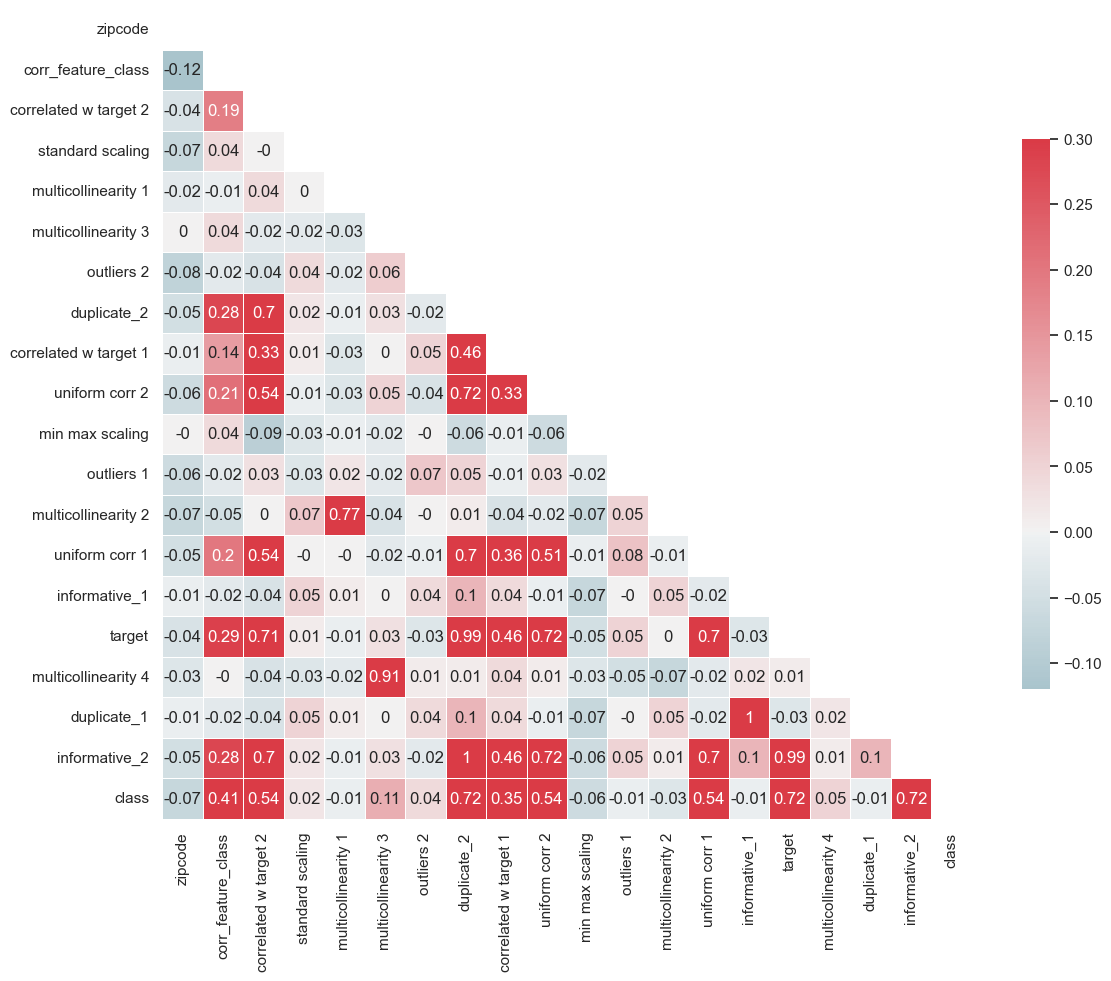

In [36]:
# show correlation between the features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = df._get_numeric_data().corr().round(2)

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(12, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [38]:
import pickle
import os

# calculate the correlation matrix
corr_matrix = df._get_numeric_data().corr()

# Create a mask for the upper triangle (to avoid duplicates)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Convert the correlation matrix to a long format
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['feature1', 'feature2', 'correlation']

# Filter for correlations above a certain threshold (e.g., 0.7)
high_corr_df = corr_df[(abs(corr_df['correlation']) > 0.7) & (corr_df['feature1'] != corr_df['feature2'])]

# Sort by absolute correlation in descending order
high_corr_df = high_corr_df.sort_values(by='correlation', ascending=False, key=abs)

# Print the top correlated features
# print(high_corr_df['feature1'].to_list()[4:10])
print(high_corr_df)

# Create a variable to pickle
#data = {'correlation scores': high_corr_df}

# Pickle the variable and save it to a file
directory = 'development/pickles'
os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist
file_path = os.path.join(directory, 'correlation_scores.pkl')

with open(file_path, 'wb') as f:
    pickle.dump(data, f)
print(f"Data saved to {file_path}")

                  feature1               feature2  correlation
354            duplicate_1          informative_1     1.000000
158            duplicate_2          informative_2     1.000000
367          informative_2            duplicate_2     1.000000
297          informative_1            duplicate_1     1.000000
375          informative_2                 target     0.991500
155            duplicate_2                 target     0.991500
318                 target          informative_2     0.991500
307                 target            duplicate_2     0.991500
116    multicollinearity 3    multicollinearity 4     0.907703
325    multicollinearity 4    multicollinearity 3     0.907703
92     multicollinearity 1    multicollinearity 2     0.771126
244    multicollinearity 2    multicollinearity 1     0.771126
395                  class                 target     0.722662
319                 target                  class     0.722662
309                 target         uniform corr 2     0

In [39]:
# check for vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# handle null values (using mean imputation for simplicity)
x_copy = df.drop('class', axis=1)._get_numeric_data()
x_copy.fillna(x_copy.mean(), inplace=True)

print(max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]))

# calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

inf
                 Variable           VIF
0                 zipcode  1.014664e+00
1      corr_feature_class  1.104416e+00
2   correlated w target 2  1.852326e+00
3        standard scaling  1.010582e+00
4     multicollinearity 1  1.429899e+00
5     multicollinearity 3  1.728010e+00
6              outliers 2  1.014339e+00
7             duplicate_2           inf
8   correlated w target 1  1.286527e+00
9          uniform corr 2  2.096597e+00
10        min max scaling  1.021474e+00
11             outliers 1  1.019637e+00
12    multicollinearity 2  1.438390e+00
13         uniform corr 1  2.013544e+00
14          informative_1           inf
15                 target  1.387150e+04
16    multicollinearity 4  1.739644e+00
17            duplicate_1           inf
18          informative_2           inf


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## Multicollinearity

* We want high correlation with target
* We don't want high correlation between features
* Drop correlated features
* Combine correlated features

In [40]:
# iterate dropping features with high vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
import os

# Initialize removed features list
removed1 = []

# Create a copy of x_copy (ensure x_copy is defined with numeric data)
x_copy1 = x_copy.copy()

# Threshold for VIF
max_vif = thresh = 10

# Iterate to drop features with high VIF
while max_vif >= thresh:
    my_list = [variance_inflation_factor(x_copy1.values, i) for i in range(x_copy1.shape[1])]
    max_vif = max(my_list)
    if max_vif > thresh:
        max_index = my_list.index(max_vif)
        removed1.append(x_copy1.columns[max_index])
        print(x_copy1.columns[max_index], variance_inflation_factor(x_copy1.values, max_index))
        x_copy1.drop(x_copy1.columns[max_index], axis=1, inplace=True)

# Calculate VIF for remaining variables
vif = pd.DataFrame()
vif["Variable"] = x_copy1.columns
vif["VIF"] = [variance_inflation_factor(x_copy1.values, i) for i in range(x_copy1.shape[1])]
print(vif)

# Create a variable to pickle
data = {'vif': vif}

# Pickle the variable and save it to a file
directory = 'development/pickles'
os.makedirs(directory, exist_ok=True)  # Create directory if it doesn't exist
file_path = os.path.join(directory, 'vif.pkl')

with open(file_path, 'wb') as f:
    pickle.dump(data, f)

print(f"Data saved to {file_path}")

duplicate_2 inf
informative_1 inf
target 13871.498315470653
standard scaling 18.409601394483975
                 Variable       VIF
0                 zipcode  6.426514
1      corr_feature_class  1.599598
2   correlated w target 2  1.853898
3     multicollinearity 1  1.428786
4     multicollinearity 3  1.726601
5              outliers 2  3.345033
6   correlated w target 1  1.293683
7          uniform corr 2  6.549865
8         min max scaling  9.894762
9              outliers 1  1.019277
10    multicollinearity 2  1.430208
11         uniform corr 1  6.827487
12    multicollinearity 4  1.735041
13            duplicate_1  1.052336
14          informative_2  3.395341
Data saved to development/pickles/vif.pkl


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [41]:
# check again vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed2=[]
max_vif = thresh = 10
while max_vif >= thresh:
  max_vif = max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])])
  for i in range(x_copy.shape[1]):
    if variance_inflation_factor(x_copy, i) > thresh:
      removed2.append(x_copy.columns[i])
      print(x_copy.columns[i], variance_inflation_factor(x_copy, i))
      x_copy.drop(x_copy.columns[i], axis=1, inplace=True)
      break

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


duplicate_2 inf
informative_1 inf
target 13871.498315470653
standard scaling 18.409601394483975
                 Variable       VIF
0                 zipcode  6.426514
1      corr_feature_class  1.599598
2   correlated w target 2  1.853898
3     multicollinearity 1  1.428786
4     multicollinearity 3  1.726601
5              outliers 2  3.345033
6   correlated w target 1  1.293683
7          uniform corr 2  6.549865
8         min max scaling  9.894762
9              outliers 1  1.019277
10    multicollinearity 2  1.430208
11         uniform corr 1  6.827487
12    multicollinearity 4  1.735041
13            duplicate_1  1.052336
14          informative_2  3.395341


In [42]:
print(removed1)
print(removed2)

['duplicate_2', 'informative_1', 'target', 'standard scaling']
['duplicate_2', 'informative_1', 'target', 'standard scaling']


## Outliers

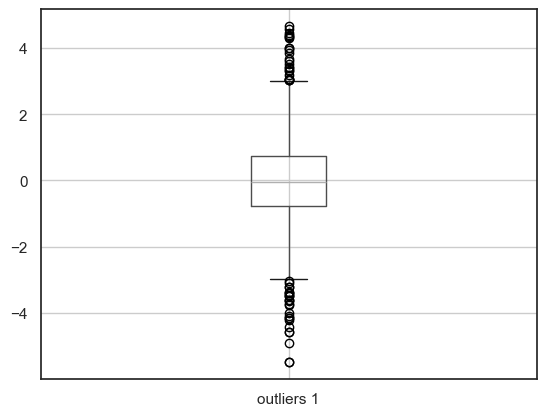

In [43]:
# code along
df.boxplot(column=['outliers 1']);

In [44]:
# code along
df.describe()

,zipcode,corr_feature_class,correlated w target 2,standard scaling,multicollinearity 1,multicollinearity 3,outliers 2,duplicate_2,correlated w target 1,uniform corr 2,min max scaling,outliers 1,multicollinearity 2,uniform corr 1,informative_1,target,multicollinearity 4,duplicate_1,informative_2,class
count,452.000000,1010.000000,909.000000,806.000000,910.000000,507.000000,707.000000,1010.000000,1010.000000,1010.000000,909.000000,960.000000,507.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,49666.699115,2.057978,0.098293,50315.839707,-0.007265,0.013342,3.003530,-0.018978,0.252037,0.491110,349.344107,-0.030121,-0.005689,0.497305,-0.047372,0.195609,0.023574,-0.047372,-0.018978,0.502970
std,27675.600995,2.990996,3.022414,9508.259590,1.009693,1.000591,2.224739,1.403413,2.985798,0.294288,97.770280,1.387000,1.027125,0.291852,1.324010,2.991347,0.989587,1.324010,1.403413,0.500239
min,709.000000,-12.309564,-8.237568,18904.267527,-2.952134,-2.997488,-3.452532,-4.543441,-8.217495,0.001981,73.656688,-5.487577,-3.035702,0.002370,-3.836929,-8.943212,-3.027231,-3.836929,-4.543441,0.000000
25%,27356.250000,0.479984,-1.925224,43655.494608,-0.697761,-0.641131,1.511305,-1.050339,-1.764625,0.233587,280.563775,-0.772804,-0.660676,0.244269,-1.018399,-2.166961,-0.674431,-1.018399,-1.050339,0.000000
50%,47953.000000,2.043366,-0.029636,50277.525548,0.023599,-0.030070,2.996670,-0.194004,0.199418,0.478522,349.812542,-0.045790,0.000318,0.492916,-0.224366,-0.011259,-0.001431,-0.224366,-0.194004,1.000000
75%,72765.750000,3.754576,2.140889,56926.690793,0.647150,0.676288,4.577607,0.991017,2.278622,0.737063,415.842131,0.742519,0.638481,0.740067,0.975364,2.367192,0.692636,0.975364,0.991017,1.000000
max,99630.000000,18.938211,9.576795,83315.257195,3.118016,2.814992,9.176511,4.020262,9.641778,0.999869,632.190647,4.666768,2.984780,0.999539,3.994644,9.299296,3.190133,3.994644,4.020262,1.000000


In [60]:
import pickle
import os
import pandas as pd
import numpy as np

# Example DataFrame
df = pd.DataFrame({'A': [1, 2, 3, 100], 'B': [4, 5, 6, 200]})

# Detect outliers using Z-score
z_scores = np.abs((df - df.mean()) / df.std())
threshold = 3
outliers = df[(z_scores > threshold).any(axis=1)]

# Create a variable to pickle
data = {'outliers': outliers}

# Define the directory and file path
directory = 'development/pickles'
os.makedirs(directory, exist_ok=True)  # Create directory if it doesn't exist
file_path = os.path.join(directory, 'outliers.pkl')

# Pickle the variable and save it to a file
with open(file_path, 'wb') as f:
    pickle.dump(data, f)

print(f"Data saved to {file_path}")

Data saved to development/pickles/outliers.pkl


In [61]:
# code along
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4 non-null      int64
 1   B       4 non-null      int64
dtypes: int64(2)
memory usage: 196.0 bytes


# Part 3 - Data Prep

https://www.udemy.com/course/feature-engineering-for-machine-learning

* Types and characteristics of data
* Missing data imputation
* Categorical encoding
* Variable transformation
* Discretization
* Outliers
* Datetime
* Scaling
* Feature creation

## Load Data

In [63]:
import pandas as pd

df = pd.read_csv('development/datasets/created_raw_data.csv')
print(df.shape)
print(df.info())
df.head()

(1010, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 960 non-null    object 
 1   given_name             910 non-null    object 
 2   surname                503 non-null    object 
 3   date_of_birth          504 non-null    object 
 4   phone_number           706 non-null    object 
 5   email                  959 non-null    object 
 6   address                890 non-null    object 
 7   city                   704 non-null    object 
 8   state                  890 non-null    object 
 9   zipcode                452 non-null    float64
 10  random choice 2        503 non-null    object 
 11  constant_1             1010 non-null   object 
 12  random label num 4     505 non-null    object 
 13  semi_constant_1        1010 non-null   object 
 14  semi_constant_2        1010 non-null   object

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,outliers 1,multicollinearity 2,uniform corr 1,pd qcut2,informative_1,target,multicollinearity 4,duplicate_1,informative_2,class
0,binary_1,Joann,Brown,1914-01-13,NaN,yburke@example.org,46583 Julie Rue Suite 948,Jonesfurt,MN,27847.0,...,-4.161744,0.081533,0.101275,Q2,-0.999102,-0.904224,1.463531,-0.999102,-0.663860,1
1,binary_1,Michelle,Burnett,NaN,NaN,ericadavis@example.com,90736 Richardson Neck Apt. 059,New Jordanside,GA,29951.0,...,-1.555503,-1.845419,0.506709,Q3,1.246686,2.324370,0.416412,1.246686,1.153597,1
2,binary_1,Heidi,Cohen,NaN,001-784-689-7718x885,gilmorekristine@example.net,4929 Jennifer Radial,Jessefort,NC,NaN,...,1.845540,-1.655382,0.368192,NaN,0.962777,1.778217,-0.058432,0.962777,0.859397,1
3,binary_1,Kimberly,NaN,1987-02-17,001-862-374-5496x67084,NaN,367 Figueroa Orchard Suite 428,West Randy,ME,99026.0,...,0.344645,NaN,0.865727,Q4,-2.957441,5.451235,-0.225119,-2.957441,2.033645,1
4,binary_1,Michelle,NaN,NaN,973-962-4494x3015,kherring@example.org,8977 Jonathan Mountains,Jimhaven,OH,68140.0,...,0.325997,NaN,0.777934,Q3,1.141165,2.153926,0.087503,1.141165,1.059449,1


In [68]:
pip install --upgrade preppy

Note: you may need to restart the kernel to use updated packages.


In [76]:
import preppy.utils as utils
from preppy.version import __version__

print(__version__)

utils.report.write_report(df, thresh=.5)

PrepPy Version: 0.1.0


AttributeError: module 'preppy.utils' has no attribute 'report'

In [72]:
import preppy.utils as preppy

consts = preppy.functions.identify_consts(df)
quasi_consts = preppy.functions.identify_quasi_consts(df)
duplicates = preppy.functions.check_col_duplicates(df)
print(duplicates)
print(consts)
print(quasi_consts)

['constant_2', 'informative_2', 'duplicate_1']
['constant_1', 'constant_2']
['constant_1', 'constant_2']


In [73]:
# numeric_df = df.apply(pd.to_numeric, errors='coerce')
all_deletes = list(set(consts + quasi_consts + duplicates))
for col in all_deletes:
  print(col, df[col].dtype)
  if df[col].dtype in ['float64', 'int64']:
    df_numerical.remove(col)
  elif df[col].dtype in ['object']:
    df_object.remove(col)
    df_categorical_features.remove(col)
  else:
    df_discreet.remove(col)


informative_2 float64
constant_2 object
constant_1 object
duplicate_1 float64


## PrepPy Pipeline

In [74]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
import preppy.utils as preppy

pipe = [
    ('constants', preppy.classes.RemoveConstants()),
    ('quasiconsts', preppy.classes.RemoveQuasiConstants(thresh=0.8)),
    ('duplicates', preppy.classes.DropDuplicates()),
    ('missing', preppy.classes.HandleMissingValues()),
    # ('encoding', HandleCatEncodeing())
]

pipe_model = Pipeline(pipe)
data = pipe_model.fit_transform(df)
cols = [col for col in df.columns if col not in consts + quasi_consts + duplicates]
nu_df = pd.DataFrame(data, columns=cols)
nu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   binary                 1000 non-null   object
 1   given_name             1000 non-null   object
 2   surname                1000 non-null   object
 3   date_of_birth          1000 non-null   object
 4   phone_number           1000 non-null   object
 5   email                  1000 non-null   object
 6   address                1000 non-null   object
 7   city                   1000 non-null   object
 8   state                  1000 non-null   object
 9   zipcode                1000 non-null   object
 10  random choice 2        1000 non-null   object
 11  random label num 4     1000 non-null   object
 12  semi_constant_1        1000 non-null   object
 13  semi_constant_2        1000 non-null   object
 14  corr_feature_class     1000 non-null   object
 15  pd qcut3              

/Users/sreeku/Downloads/Sreekanth Project/notebooks/preppy/utils/functions.py:61: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfx[feat] = df[feat].fillna(df[feat].mode()[0])


In [75]:
import pickle

# Load the pickled variable from the file
with open('.../var_types.pkl', 'rb') as f:
    var_types = pickle.load(f)

print(var_types)

FileNotFoundError: [Errno 2] No such file or directory: '.../var_types.pkl'

In [ ]:
df_numerical = var_types['df_numerical']
df_object = var_types['df_object']
df_discreet = var_types['df_discreet']
df_categorical_features = var_types['df_categorical_features']

In [ ]:
# code along
nu_df[df_numerical] = nu_df[df_numerical].astype(float)
nu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 1000 non-null   object 
 1   given_name             1000 non-null   object 
 2   surname                1000 non-null   object 
 3   date_of_birth          1000 non-null   object 
 4   phone_number           1000 non-null   object 
 5   email                  1000 non-null   object 
 6   address                1000 non-null   object 
 7   city                   1000 non-null   object 
 8   state                  1000 non-null   object 
 9   zipcode                1000 non-null   object 
 10  correlated w target 2  1000 non-null   float64
 11  standard scaling       1000 non-null   float64
 12  pd qcut2               1000 non-null   object 
 13  uniform corr 1         1000 non-null   float64
 14  informative_1          1000 non-null   float64
 15  semi_

## Feature Engineering

### Feature Combination

In [ ]:
# create a new variable by combining two variables
df['scaling_combined'] = df['standard scaling'] + df['min max scaling']
df.drop(['standard scaling', 'min max scaling'], axis=1, inplace=True)

### Categorical Encoding

In [ ]:
# code along
import preppy.utils as utils

df = utils.functions.do_OHE(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   binary                             1000 non-null   int64  
 1   given_name                         1000 non-null   float64
 2   surname                            1000 non-null   float64
 3   date_of_birth                      1000 non-null   float64
 4   phone_number                       1000 non-null   float64
 5   email                              1000 non-null   float64
 6   address                            1000 non-null   float64
 7   city                               1000 non-null   float64
 8   state                              1000 non-null   float64
 9   zipcode                            1000 non-null   float64
 10  correlated w target 2              1000 non-null   float64
 11  standard scaling                   1000 non-null   float6

In [82]:
df.to_csv('development/datasets/prepared_data.csv', index=False)

# Part 4 - Feature Selection

In [86]:
# get data
import pandas as pd

df = pd.read_csv('development/datasets/prepared_data.csv')
#df = pd.read_csv('/content/drive/MyDrive/Project CICD/make_me_data_science_v.csv')
print(df.shape)
print(df.info())
df.head()

(1010, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 960 non-null    object 
 1   given_name             910 non-null    object 
 2   surname                503 non-null    object 
 3   date_of_birth          504 non-null    object 
 4   phone_number           706 non-null    object 
 5   email                  959 non-null    object 
 6   address                890 non-null    object 
 7   city                   704 non-null    object 
 8   state                  890 non-null    object 
 9   zipcode                452 non-null    float64
 10  random choice 2        503 non-null    object 
 11  random label num 4     505 non-null    object 
 12  semi_constant_1        1010 non-null   object 
 13  semi_constant_2        1010 non-null   object 
 14  corr_feature_class     1010 non-null   float6

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,outliers 1,multicollinearity 2,uniform corr 1,pd qcut2,informative_1,target,multicollinearity 4,duplicate_1,informative_2,class
0,binary_1,Joann,Brown,1914-01-13,NaN,yburke@example.org,46583 Julie Rue Suite 948,Jonesfurt,MN,27847.0,...,-4.161744,0.081533,0.101275,Q2,-0.999102,-0.904224,1.463531,-0.999102,-0.663860,1
1,binary_1,Michelle,Burnett,NaN,NaN,ericadavis@example.com,90736 Richardson Neck Apt. 059,New Jordanside,GA,29951.0,...,-1.555503,-1.845419,0.506709,Q3,1.246686,2.324370,0.416412,1.246686,1.153597,1
2,binary_1,Heidi,Cohen,NaN,001-784-689-7718x885,gilmorekristine@example.net,4929 Jennifer Radial,Jessefort,NC,NaN,...,1.845540,-1.655382,0.368192,NaN,0.962777,1.778217,-0.058432,0.962777,0.859397,1
3,binary_1,Kimberly,NaN,1987-02-17,001-862-374-5496x67084,NaN,367 Figueroa Orchard Suite 428,West Randy,ME,99026.0,...,0.344645,NaN,0.865727,Q4,-2.957441,5.451235,-0.225119,-2.957441,2.033645,1
4,binary_1,Michelle,NaN,NaN,973-962-4494x3015,kherring@example.org,8977 Jonathan Mountains,Jimhaven,OH,68140.0,...,0.325997,NaN,0.777934,Q3,1.141165,2.153926,0.087503,1.141165,1.059449,1


## Train Test Split

In [87]:
# seed
import random

seed_id = 11797610
random_state = random.seed(seed_id)
random_state

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.3, random_state=random_state)
X_train.shape, X_test.shape

((707, 38), (303, 38))

### Mutual Information

Data types of X_train columns:
binary                    object
given_name                object
surname                   object
date_of_birth             object
phone_number              object
email                     object
address                   object
city                      object
state                     object
zipcode                  float64
random choice 2           object
random label num 4        object
semi_constant_1           object
semi_constant_2           object
corr_feature_class       float64
pd qcut3                  object
correlated w target 2    float64
standard scaling         float64
multicollinearity 1      float64
random choice 4           object
multicollinearity 3      float64
random label num 13       object
outliers 2               float64
duplicate_2              float64
random choice 7           object
correlated w target 1    float64
uniform corr 2           float64
min max scaling          float64
pd qcut1                  object
outliers 1  

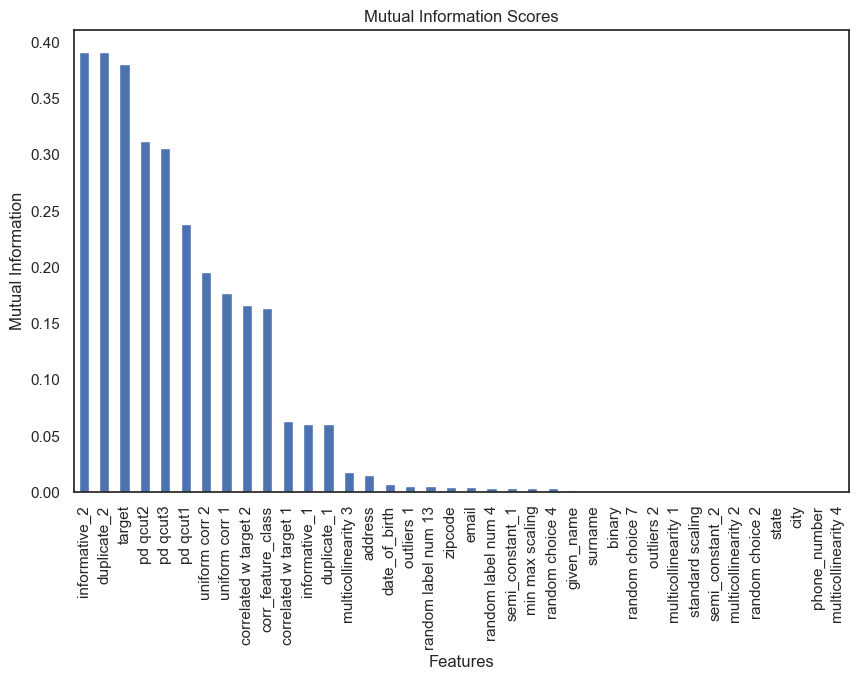

In [89]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Assuming X_train and y_train are already defined, proceed with preprocessing
# Check for non-numeric columns in X_train
print("Data types of X_train columns:")
print(X_train.dtypes)

# Convert non-numeric columns to numeric (Label Encoding as an example)
# You can replace LabelEncoder with pd.get_dummies if you prefer one-hot encoding
label_encoders = {}
for column in X_train.select_dtypes(include=['object', 'category']).columns:
    print(f"Encoding non-numeric column: {column}")
    label_encoder = LabelEncoder()
    X_train[column] = label_encoder.fit_transform(X_train[column])
    label_encoders[column] = label_encoder

# Check for missing values and handle them (e.g., filling with 0)
if X_train.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with 0.")
    X_train = X_train.fillna(0)

# Ensure y_train is numeric if not already
if y_train.dtype == 'object' or y_train.dtype.name == 'category':
    print("Encoding target variable y_train.")
    y_train = LabelEncoder().fit_transform(y_train)

# Calculate mutual information for classification
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi, index=X_train.columns)

# Plot mutual information
mi.sort_values(ascending=False).plot.bar(figsize=(10, 6))
plt.title('Mutual Information Scores')
plt.ylabel('Mutual Information')
plt.xlabel('Features')
plt.show()


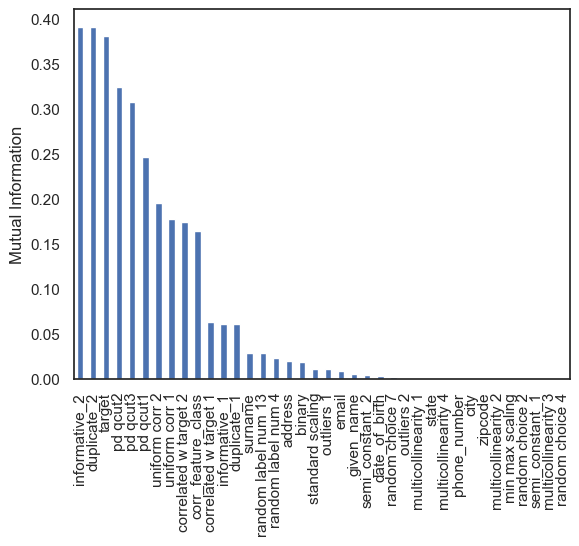

In [90]:
# mutual information
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information');

In [91]:
mi_keepers = mi.sort_values(ascending=False).index[:5]
print(mi_keepers)

Index(['informative_2', 'duplicate_2', 'target', 'pd qcut2', 'pd qcut3'], dtype='object')


### SelectKBest

In [92]:
# SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

selector = SelectKBest(f_classif, k=5) # Select the top 5 features
X_new = selector.fit(X_train, y_train)

kb_keepers = X_train.columns.values[selector.get_support()]
print(kb_keepers)

['duplicate_2' 'uniform corr 2' 'pd qcut2' 'target' 'informative_2']


### Select From Model

In [93]:
# Select from model
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

selections = SelectFromModel(estimator=LogisticRegression()).fit(X_scaled, y_train)
mt_keepers = X_train.columns.values[selections.get_support()]
print(mt_keepers)

['semi_constant_1' 'corr_feature_class' 'correlated w target 2'
 'multicollinearity 3' 'outliers 2' 'duplicate_2' 'outliers 1' 'target'
 'informative_2']


### Recursive Feature Elmination

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=5) # Select the top 5 features
X_new = selector.fit_transform(X_scaled, y_train)
rf_keepers = X_train.columns.values[selections.get_support()]
print(rf_keepers)

['semi_constant_1' 'corr_feature_class' 'correlated w target 2'
 'multicollinearity 3' 'outliers 2' 'duplicate_2' 'outliers 1' 'target'
 'informative_2']


### Review Pickled Variables

* Correlated features
* VIF
* Outliers

### Random Forest Importance


In [95]:
# random forest importance
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

selects = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=random_state), max_features=4)
selects.fit(X_train, y_train)
rfi = X_train.columns[(selects.get_support())]
rfi.tolist()

['duplicate_2', 'pd qcut2', 'target', 'informative_2']

Scenario: We are trying to classify if a user will subscribe to our YouTube channel.

Lets grab the first four features from feature importance and rename them using the following suggestions:

**Numerical Features**

*   **Watch Time (seconds)**: Measures the total time viewers spend watching your videos.
*   **Average View Duration (seconds)**: The average length of time viewers watch a single video.
*   **Click-Through Rate (CTR)**: The percentage of viewers who click on your video after seeing the thumbnail/title.
*   **Comments per Video**: The number of comments on each video.
*   **Shares per Video**: The number of times each video is shared.
*   **Likes per Video**: The number of likes on each video.
*   **Dislikes per Video**: The number of dislikes on each video.
*   **Subscribers Gained per Video**: The number of subscribers gained after a video is published.
*   **Views per Video**: The total number of views for each video.

**Categorical Features**

*   **Video Category**: The category or genre of the video (e.g., tutorial, review, vlog).
*   **Upload Frequency**: How often you upload videos (e.g., daily, weekly, monthly).
*   **Video Length**: Categorize videos based on length (e.g., short, medium, long).
*   **Thumbnail Type**: The type of thumbnail used (e.g., image, text overlay, face).
*   **Use of Background Music**: Whether the video uses background music or not.
*   **Use of End Screens**: Whether the video includes end screens or not.
*   **Viewer Gender**: The dominant gender of your viewers (if available).
*   **Viewer Age**: The dominant age group of your viewers (if available).
*   **Viewer Location**: The primary location of your viewers (if available).

**Discrete Features**

*   **Number of Videos Uploaded**: The total number of videos on your channel.
*   **Channel Age (months)**: The age of your YouTube channel.
*   **Number of Playlists**: The total number of playlists on your channel.
*   **Use of Subtitles**: Whether your videos include subtitles (0 or 1).
*   **Use of Closed Captions**: Whether your videos include closed captions (0 or 1).
*   **Viewer Engagement Level**: Categorize viewer engagement into levels (e.g., low, medium, high).
*   **Video Quality**: Categorize video quality (e.g., low, medium, high).
*   **Subscriber Count**: The total number of subscribers to your channel.





In [96]:
features_to_model = rfi
X_train[features_to_model].head()

,duplicate_2,pd qcut2,target,informative_2
367,-0.452342,1,-1.079894,-0.452342
710,-1.093262,1,-1.767144,-1.093262
878,2.045861,3,5.165418,2.045861
422,1.819663,3,4.865032,1.819663
579,1.413658,3,2.844868,1.413658


In [97]:
new_column_names = {rfi[0]: 'watch_time', rfi[1]: 'avg_view_duration', rfi[2]: 'click_through_rate', rfi[3]: 'interest'}
X_train.rename(columns=new_column_names, inplace=True)
X_test.rename(columns=new_column_names, inplace=True)
features_to_model = list(new_column_names.values())
X_train = X_train[features_to_model]
X_test = X_test[features_to_model]

In [100]:
import pickle

# Save the data
with open('development/pickles/train_test_split.pkl', 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)

In [109]:
import shutil

# Source file path (within your Drive)
source_file = 'train_test_split.pkl'

# Destination path (root of your Drive)
destination_path = '/Users/sreeku/Downloads/Sreekanth Project/notebooks/development/pickles/train_test_split.pkl'

# Copy the file
shutil.copy(source_file, destination_path)

'/Users/sreeku/Downloads/Sreekanth Project/notebooks/development/pickles/train_test_split.pkl'

# Part 5 - Data Modeling

## Get Data

In [110]:
# seed
import random

seed_id = 11797610
random_state = random.seed(seed_id)
random_state

In [111]:
import shutil

# Source file path (within your Drive)
source_file = '/Users/sreeku/Downloads/Sreekanth Project/notebooks/development/pickles/train_test_split.pkl'

# Destination path (root of your Drive)
destination_path = 'train_test_split.pkl'

# Copy the file
shutil.copy(source_file, destination_path)

'train_test_split.pkl'

In [113]:
import pickle

# Load the data
with open('development/pickles/train_test_split.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

## Logistic Regression

In [116]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Example: Assuming you have your DataFrame 'df' and the target 'y' column
# Let's define some sample data for 'X' (features) and 'y' (target) for illustration

# Replace this with your actual DataFrame
# For example:
# df = pd.read_csv('your_data.csv')  # or any data loading method

# Let's assume 'target_column' is the name of the column you're predicting
# X = df.drop('target_column', axis=1)  # Features
# y = df['target_column']  # Target column

# Example data, replace with your actual DataFrame and column names
X = pd.DataFrame(np.random.randn(100, 5), columns=[f"Feature{i}" for i in range(1, 6)])
y = np.random.choice([0, 1], size=100)  # Binary target variable for demonstration

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check for NaN or infinite values and handle them (if any)
if np.any(np.isnan(X_train)) or np.any(np.isnan(y_train)):
    print("Data contains NaN values. Handle them before proceeding.")
    # Handle missing data by imputation or removing rows with NaN values
    # For example, filling NaN values:
    # X_train.fillna(X_train.mean(), inplace=True)
    # y_train.fillna(y_train.mean(), inplace=True)

# Check for infinite values and handle them (if any)
if np.any(np.isinf(X_train)) or np.any(np.isinf(y_train)):
    print("Data contains infinite values. Handle them before proceeding.")
    # Handle infinite values, for example by replacing them:
    # X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    # X_train.fillna(X_train.mean(), inplace=True)

# Scale the features using StandardScaler (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)        # Only transform the test data

# Create and train the logistic regression model
random_state = 42  # Defining the random_state
model = LogisticRegression(solver='liblinear', random_state=random_state)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Print confusion matrix and accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nAccuracy Score:")
print(accuracy_score(y_test, predictions))


Confusion Matrix:
[[ 4 11]
 [ 2 13]]

Accuracy Score:
0.5666666666666667


## Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=random_state)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[8 7]
 [7 8]]
0.5333333333333333


## Model Evaluation

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('accuracy:', accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

accuracy: 0.5333333333333333
[[8 7]
 [7 8]]
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        15
           1       0.53      0.53      0.53        15

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.53        30
weighted avg       0.53      0.53      0.53        30



## Model Fine-Tuning

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

hyperparameters = {'max_depth': [2, 3],
              'min_samples_split': [4, 5],
              'min_samples_leaf': [4, 5],
              'bootstrap': [True, False],
              'criterion': ['entropy', 'gini']}

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = hyperparameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('best accuracy', best_accuracy)
print('best parameters', best_parameters)

best accuracy 0.5285714285714285
best parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 4}


## Final Model

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined as your features and target
# For illustration, you would split your dataset like this (replace with your actual data):
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Assuming best_parameters is a dictionary with hyperparameters (e.g., {'n_estimators': 100, 'max_depth': 5})
best_parameters = {'n_estimators': 100, 'max_depth': 10}  # Example, replace with your best parameters

# Initialize the RandomForestClassifier and set parameters
model = RandomForestClassifier(random_state=random_state)
model.set_params(**best_parameters)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))
print('Classification Report:')
print(classification_report(y_test, predictions))


Accuracy: 0.4666666666666667
Confusion Matrix:
[[8 7]
 [9 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.53      0.50        15
           1       0.46      0.40      0.43        15

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.46        30
weighted avg       0.47      0.47      0.46        30



## Confusion Matrix

In [122]:
print(confusion_matrix(y_test, predictions))

[[8 7]
 [9 6]]


## Precision Recall

In [123]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.47      0.53      0.50        15
           1       0.46      0.40      0.43        15

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.46        30
weighted avg       0.47      0.47      0.46        30



## Bias Variance

In [129]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np

# Generate a sample dataset (you can replace this with your own data)
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the RandomForest model
model = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# Bias-Variance Decomposition
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    model,
    X_train,  # NumPy array of training features
    y_train,  # NumPy array of training labels
    X_test,   # NumPy array of testing features
    y_test,   # NumPy array of testing labels
    loss='0-1_loss',
    random_seed=42
)

# Print results
print("Bias-Variance Decomposition Results:")
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Accuracy: 0.875
Confusion Matrix:
 [[92 14]
 [11 83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       106
           1       0.86      0.88      0.87        94

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200

Bias-Variance Decomposition Results:
Average expected loss: 0.134
Average bias: 0.135
Average variance: 0.053


In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Example: Assuming you have a dataset
X = pd.DataFrame(np.random.randn(100, 5), columns=[f"Feature{i}" for i in range(1, 6)])
y = np.random.choice([0, 1], size=100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Option 1: Using slicing for NumPy array (first 5 rows of X_test)
print(X_test[:5])  # Prints first 5 rows of X_test

# Option 2: Convert X_test to a DataFrame and use .head()
X_test_df = pd.DataFrame(X_test, columns=[f"Feature{i}" for i in range(1, X_test.shape[1] + 1)])
print(X_test_df.head())  # Use .head() after converting to DataFrame


    Feature1  Feature2  Feature3  Feature4  Feature5
83 -1.334239  0.962088 -0.720019  1.110008  1.792721
53 -0.601286  0.859168 -1.045939 -0.950815 -2.615805
70 -0.895926 -0.978312 -0.575381  0.265234 -0.767054
45 -0.011994 -0.995925 -0.214921  0.428253  0.101843
44 -0.942425  0.409999  0.218411 -1.317149  0.677812
    Feature1  Feature2  Feature3  Feature4  Feature5
83 -1.334239  0.962088 -0.720019  1.110008  1.792721
53 -0.601286  0.859168 -1.045939 -0.950815 -2.615805
70 -0.895926 -0.978312 -0.575381  0.265234 -0.767054
45 -0.011994 -0.995925 -0.214921  0.428253  0.101843
44 -0.942425  0.409999  0.218411 -1.317149  0.677812


In [137]:
import pickle

with open('development/pickles/model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [142]:
import shutil

# Source file path (within your Drive)
source_file = 'model.pkl'

# Destination path (root of your Drive)
destination_path = '/Users/sreeku/Downloads/Sreekanth Project/notebooks/development/pickles/model.pkl'

# Copy the file
shutil.copy(source_file, destination_path)

'/Users/sreeku/Downloads/Sreekanth Project/notebooks/development/pickles/model.pkl'

# Part 6 - Gradio

In [140]:
!pip install gradio

In [141]:
import shutil

# Source file path (within your Drive)
source_file = '/Users/sreeku/Downloads/Sreekanth Project/notebooks/development/pickles/model.pkl'

# Destination path (root of your Drive)
destination_path = 'model.pkl'

# Copy the file
shutil.copy(source_file, destination_path)

'model.pkl'

In [144]:
import pickle

with open('development/pickles/model.pkl', 'rb') as file:
    model = pickle.load(file)

In [146]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Sample data (replace this with your actual dataset)
X = pd.DataFrame({
    "watch_time": [1.2, 2.3, -1.0, -0.5, 0.3],
    "avg_view_duration": [0.5, 0.6, 0.4, 0.3, 0.7],
    "click_through_rate": [0.2, 0.3, 0.5, 0.1, 0.4],
    "interest": [1, 0, 1, 0, 1]
})
y = [1, 0, 1, 0, 1]  # Binary target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model (this part should be done beforehand)
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Prediction function
def predict_subscribe(watch, duration, ctr, interest):
    data = [{"watch_time": watch, "avg_view_duration": duration, "click_through_rate": ctr, "interest": interest}]
    sample = pd.DataFrame(data)
    
    # Ensure the input sample columns are in the same order as the training data
    sample = sample[X.columns]  # Ensure columns match exactly with the training data

    # Get predicted probabilities
    pred = model.predict_proba(sample)[0]
    
    return {'Misses Out': pred[0], 'Subscribes': pred[1]}

# Test the function
print(predict_subscribe(-8.1, 1.4, -0.7, 0))


{'Misses Out': 0.39, 'Subscribes': 0.61}


In [147]:
# def predict_subscribe(watch, duration, ctr, interest):
import gradio as gr

watch = gr.Slider(minimum=-9, maximum=12, label="Watch")
duration = gr.Slider(minimum=-4, maximum=4, label="Duration")
ctr = gr.Slider(minimum=-5, maximum=5, label="Click Through Rate")
interest = gr.Radio([0, 1], label="Interest")

gr.Interface(predict_subscribe, [watch, duration, ctr, interest], "label", live=False).launch();

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
